# K-Means Clustering

Decide no. of cluster, randomly place centroids for each cluster, draw line to separate the clusters (line bw 2 clusters must be equidistant to their centroids) -> assign data points on either side to the 2 clusters -> replce the centroid with the centre of gravity of each cluster (average) -> repeat until no change in process -> final clusters

WCSS (within Cluster sum of squares) = sum of squared distances bw each point in cluster with its centroid -> more n, of clusters, smaller wcss (closer centroid)

Do kmeans, find wcss for each setup (no. of clusters = 1,2,3,4, etc), apply elbow method

Plot x=no. of clusters, y=wcss (keeps reducing, reaches 0 when no. of clusters=no. of data points) -> kink in the chart (wcss stops dropping rapidly) = elbow = optimal no. of clusters

Random initialisation trap -> centroids initialised wrongly -> diff clusters -> diff results (model should be deterministic) -> kmeans++ -> choose one centroid at random -> for each data point, compute D (distance to nearest centroid) -> choose next centroid by weighted random selection (by D^2) -> repest till k centroids are selected

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3,4]].values

In [5]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

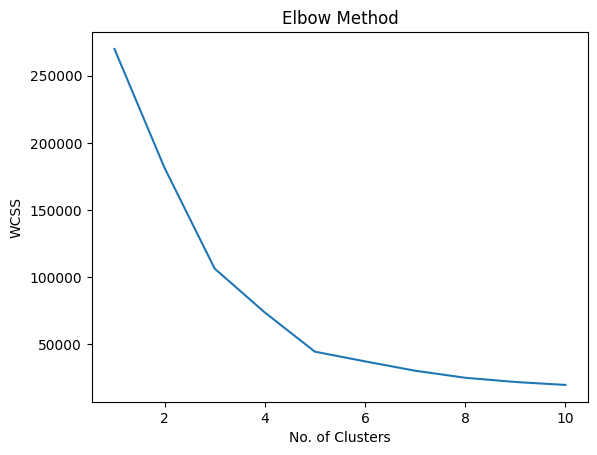

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=42)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [8]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

<function matplotlib.pyplot.show(close=None, block=None)>

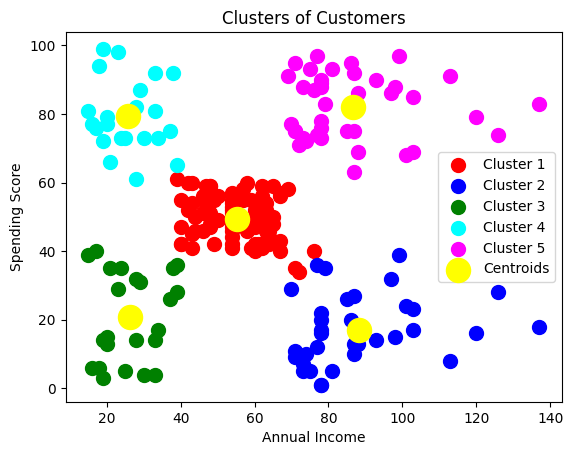

In [11]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show